# Count difference profile computation

#### Functions for count difference profile computation

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def get_skmer(sequence, i, profile):
    spaced_kmer_profile = [int(character) for character in profile]
    L = len(spaced_kmer_profile)
    spaced_kmer = sequence[i:i+L] * spaced_kmer_profile
    spaced_kmer = spaced_kmer[spaced_kmer != 0]
    return spaced_kmer

In [3]:
def parse_nucleotides(sequence):
    new_seq = []
    dict = {"a": 1, "c": 2, "g": 3, "t":4}
    for char in sequence:
        new_seq.append(dict[char])
        
    return new_seq

#
sequence_str = "cccctcgatgggcttcgatcagtcacctcaaccaacagtgcaacagtatgggcgagcaatcaacctattaggctcgttcaccgccgagcggggagaccttagtccatcaactgtcgtagacgcataagctgccctgcgtcctccaaatagcacaggtcgaaactaactagggtctactgaagctgcccaggcggtagcaa"
sequence_chars = [char for char in sequence_str]
sequence = parse_nucleotides(sequence_chars)
spaced_kmer_str_profile = "11110111111011011101010111011011111101111"
spaced_kmer_profile = [int(character) for character in spaced_kmer_str_profile]

In [4]:
def check_repeats(sequence, profile):
    spaced_kmer_profile = [int(character) for character in profile]
    f = len(spaced_kmer_profile)
    counts = {}
    reps = []
    for i in range(len(sequence) - f):
        skmer = get_skmer(sequence, i, profile)
        #print(skmer)
        skmer_str = ''.join(str(x) for x in skmer)
        #print(skmer_str)
        if skmer_str not in counts:
            counts[skmer_str] = 1
        else:
            counts[skmer_str] += 1
            print("repetition at "+str(i))
            reps.append(i)
    return reps

In [74]:
'''
def maxcount(pos, seqs, seqs_kmers, spaced_kmer_profile, seq_to_investigate=0):
    target_seq = seqs[seq_to_investigate]
    L = len(spaced_kmer_profile)
    # Get all spaced kmer counts with informative position at i
    counts_i = []   
    end_loop = min(L, pos+1)
    #print(end_loop)
    for i in range(end_loop):   # Iterate over the points at which 
        startpos = 0
        if spaced_kmer_profile[i] == 1:
            startpos = pos - i
        else:
            continue
        # Extract k mers starting at selected position
        #for seq in seqs:
        spaced_kmer = target_seq[startpos : startpos+L] * spaced_kmer_profile
        spaced_kmer = spaced_kmer[spaced_kmer != 0]
        s = ''.join(str(x) for x in spaced_kmer)
        counts_i.append(seqs_kmers[s])
    #print(counts_i)
    return max(counts_i)
    '''

"\ndef maxcount(pos, seqs, seqs_kmers, spaced_kmer_profile, seq_to_investigate=0):\n    target_seq = seqs[seq_to_investigate]\n    L = len(spaced_kmer_profile)\n    # Get all spaced kmer counts with informative position at i\n    counts_i = []   \n    end_loop = min(L, pos+1)\n    #print(end_loop)\n    for i in range(end_loop):   # Iterate over the points at which \n        startpos = 0\n        if spaced_kmer_profile[i] == 1:\n            startpos = pos - i\n        else:\n            continue\n        # Extract k mers starting at selected position\n        #for seq in seqs:\n        spaced_kmer = target_seq[startpos : startpos+L] * spaced_kmer_profile\n        spaced_kmer = spaced_kmer[spaced_kmer != 0]\n        s = ''.join(str(x) for x in spaced_kmer)\n        counts_i.append(seqs_kmers[s])\n    #print(counts_i)\n    return max(counts_i)\n    "

In [5]:
def count_profiles(filename, str_profile, seq_to_investigate=0):
    seqs = []
    with open(filename) as file_in:
        for line in file_in:
            newline = line.rstrip('\n')
            sequence_chars = [char for char in newline]
            sequence = parse_nucleotides(sequence_chars)
            seqs.append(np.array(sequence))

    profile = [int(character) for character in str_profile]
    k = sum(profile)
    L = len(profile)
    
    # Turn into np arrays for componentwise multiplication
    profile = np.array(profile)
    
    # Count occurence of spaced k-mers
    seqs_kmers = {}
    for sequence in seqs:
        for i in range(len(sequence) - L):
            spaced_kmer = sequence[i:i+L] * profile
            spaced_kmer = spaced_kmer[spaced_kmer != 0]
            s = ''.join(str(x) for x in spaced_kmer)
            if s not in seqs_kmers:
                seqs_kmers[s] = 1
            else:
                seqs_kmers[s] = seqs_kmers[s] + 1
    
    # Get maxcounts from counts
    seq1 = seqs[seq_to_investigate]
    xpoints = np.array([i for i in range(len(seq1) - L)])
    ypoints = np.array([maxcount(i, seqs, seqs_kmers, profile, seq_to_investigate=seq_to_investigate) for i in xpoints])
    
    return xpoints, ypoints

In [6]:
def count_diff_profiles(filename, str_profile, seq_to_investigate=0):
    seqs = []
    with open(filename) as file_in:
        for line in file_in:
            newline = line.rstrip('\n')
            sequence_chars = [char for char in newline]
            sequence = parse_nucleotides(sequence_chars)
            seqs.append(np.array(sequence))

    profile = [int(character) for character in str_profile]
    k = sum(profile)
    L = len(profile)
    
    # Turn into np arrays for componentwise multiplication
    profile = np.array(profile)
    
    # Count occurence of spaced k-mers
    seqs_kmers = {}
    for sequence in seqs:
        for i in range(len(sequence) - L):
            spaced_kmer = sequence[i:i+L] * profile
            spaced_kmer = spaced_kmer[spaced_kmer != 0]
            s = ''.join(str(x) for x in spaced_kmer)
            if s not in seqs_kmers:
                seqs_kmers[s] = 1
            else:
                seqs_kmers[s] = seqs_kmers[s] + 1
    
    # Get maxcounts from counts
    seq1 = seqs[seq_to_investigate]
    xpoints = np.array([i for i in range(len(seq1) - L)])
    ypoints = [maxcount(i, seqs, seqs_kmers, profile, seq_to_investigate=seq_to_investigate) for i in xpoints]
    ypoints = np.array(ypoints)

    # Get count difference profiles
    diff_profile = [ypoints[j] - ypoints[j-1] for j in range(1,len(ypoints))]
    
    return xpoints[1:], diff_profile

In [7]:
def maxcount(pos, seqs, seqs_kmers, spaced_kmer_profile, seq_to_investigate=0):
    target_seq = seqs[seq_to_investigate]
    L = len(spaced_kmer_profile)
    # Get all spaced kmer counts with informative position at i
    counts_i = []   
    end_loop = min(L, pos+1)
    #print(end_loop)
    for i in range(end_loop):   # Iterate over the points at which 
        startpos = 0
        if spaced_kmer_profile[i] == 1:
            startpos = pos - i
        else:
            counts_i.insert(0, 0) # Note that this is vital! Otherwise the argmax down in the return statement 
                                  # will not translate to the actual position!
                                  # Use insert for reasons explained below.
            continue
        # Extract k mers starting at selected position
        # for seq in seqs:
        spaced_kmer = target_seq[startpos : startpos+L] * spaced_kmer_profile
        spaced_kmer = spaced_kmer[spaced_kmer != 0]
        s = ''.join(str(x) for x in spaced_kmer)
        counts_i.insert(0, seqs_kmers[s]) # Use insert s.t. the array order makes sense for the argmax
                                          # More specifically, the argmax selects the first occurence of the maximum and we want to select
                                          # the index that represents the maximum with the smallest index
    #print(counts_i)
    return max(counts_i), pos - (L+1) + np.argmax(counts_i)

In [8]:
def fixed_maxcount(pos, seqs, seqs_kmers, spaced_kmer_profile, seq_to_investigate=0):
    target = seqs[seq_to_investigate]
    f = len(spaced_kmer_profile)
    counts_i = []
    indexes = []
    len_loop = min(f, pos+1)
    start = pos - len_loop+1
    end = min(len(target)-f, pos+1)
    for i in range(start, end):
        if spaced_kmer_profile[i-pos] != 1:
            counts_i.append(0)
            indexes.append(-1)
            continue
            
        # Extract k mers starting at selected position
        #print(i)
        #print(target[i : i+f])
        spaced_kmer = target[i : i+f] * spaced_kmer_profile
        spaced_kmer = spaced_kmer[spaced_kmer != 0]
        s = ''.join(str(x) for x in spaced_kmer)
        counts_i.append(seqs_kmers[s]) 
        indexes.append(i)
    
    return max(counts_i), indexes[np.argmax(counts_i)]

In [9]:
#
#
#
def correct_count_diffs(seqs, target, j, profile):
    end_in_jm1 = 0
    start_in_j = 0
    f = len(profile)
    # Can compute how many end in j-1?
    if j-f > 0:
        skmer1 = target[j+1-f:j+1] * profile # j+1 because ? 
        skmer1 = skmer1[skmer1 != 0]
        for seq in seqs:
            startpos = len(seq)-f
            endpos = len(seq)
            skmer2 = seq[startpos:len(seq)] * profile
            skmer2 = skmer2[skmer2 != 0]
            if (skmer1 == skmer2).all():
                end_in_jm1 += 1
    # Can compute how many start in j?
    if len(target)-j > f:
        skmer1 = target[j:j+f] * profile
        skmer1 = skmer1[skmer1 != 0]
        # Start in j
        for seq in seqs:
            skmer2 = seq[0:f] * profile
            skmer2 = skmer2[skmer2 != 0]
            if (skmer1 == skmer2).all():
                start_in_j += 1

    return start_in_j, end_in_jm1



In [10]:
#
#
#
def corr_count_diff_profiles(filename, str_profile, seq_to_investigate=0):
    seqs = []
    with open(filename) as file_in:
        for line in file_in:
            newline = line.rstrip('\n')
            sequence_chars = [char for char in newline]
            sequence = parse_nucleotides(sequence_chars)
            seqs.append(np.array(sequence))

    profile = [int(character) for character in str_profile]
    k = sum(profile)
    L = len(profile)
    
    # Turn into np arrays for componentwise multiplication
    profile = np.array(profile)
    
    # Count occurence of spaced k-mers
    seqs_kmers = {}
    for sequence in seqs:
        for i in range(len(sequence) - L):
            spaced_kmer = sequence[i:i+L] * profile
            spaced_kmer = spaced_kmer[spaced_kmer != 0]
            s = ''.join(str(x) for x in spaced_kmer)
            if s not in seqs_kmers:
                seqs_kmers[s] = 1
            else:
                seqs_kmers[s] += 1
    
    # Get maxcounts from counts
    target = seqs[seq_to_investigate]
    xpoints = np.array([i for i in range(len(target) - L)])
    ypoints = [maxcount(i, seqs, seqs_kmers, profile, seq_to_investigate=seq_to_investigate) for i in xpoints]
    ypoints = np.array(ypoints)

    # Get count difference profiles
    diff_profile = [ypoints[j] - ypoints[j-1] for j in range(1,len(ypoints))]

    # Correct count diffeence profiles
    for diff_prof_index in range(0,len(diff_profile)):
        j = diff_prof_index + 1 # Note that the difference index 0 refers to diff between 1 and 0. Thus, j=1.
        start, end = correct_count_diffs(seqs, target, j, profile)
        print("correction: " + str(end-start))
        diff_profile[diff_prof_index] += end - start
    
    return xpoints[1:], diff_profile

In [11]:
def get_correction_profile(target, seqs, overlap_size):
    corr_profile = []
    for i in range(len(target)-overlap_size):
        corr_profile.append(0)
        if i == 0:
            # Note that this whole check is necessary because our target sequence, i.e. the read we are investigating at the moment
            # also starts at the beginning and would thus be added to the count profile. We anticipate this by increasing the correction
            # profile at this point to one s.t. the loop below can reduce it to zero in the first step if just our sequence starts there.
            # If another sequence starts here, then the loop below will reduce the correction profile below zero
            corr_profile[0] = 1  
        for seq in seqs:
            if (target[i : i+overlap_size] == seq[0 : overlap_size]).all():
                corr_profile[i] -= 1
            elif (target[i : i+overlap_size] == seq[len(seq)-overlap_size : len(seq)]).all():
                corr_profile[i] += 1
    return corr_profile

In [12]:
#
# CORRECT COUNTS - AN ATTEMPT AT FIXING THE FLAW IN THE DIFFERENCE CORRECTION
#
def correct_counts(maxed_counts, maxed_count_indices, target_sequence, start_end_posis, seqs, diff_profile, kmer_profile):
    f = len(kmer_profile)
    correction_artifact = []
    # When corrections are necessary they are written into the maxed_counts array
    for i in range(1,len(maxed_count_indices)):
        # Make sure we have a change position on our hands.
        # Note the -1!! This is because the window of possibly maximising k-mers slides to the right with each iteration.
        # Thus, a sequence that was previously indexed by ...
        if maxed_count_indices[i] != maxed_count_indices[i-1] and maxed_counts[i] != maxed_counts[i-1]: 
            # Correct for reads that start in between the two maxed_count indices:
            #start_sum_at = max(i-f,0)
            start_sum_at = maxed_count_indices[i-1]+1
            #start_sum_at = max(0, maxed_count_indices[i-1]-f)
            #start_sum_at = i-1
            end_sum_at = maxed_count_indices[i]+1
            #end_sum_at = i+1
            # Note that the correction can't be computed as simply as: sum(start_end_posis[start_sum_at:end_sum_at]).
            # This is due to the fact that some reads might be starting or ending in the interval that we're investigating, but:
            # they might not have an informative position at the nucleotide we're investigating. Thus, they can't possibly have
            # an effect on a difference that occurs at that nucleotide.
            correction = 0
            if start_sum_at <= end_sum_at:
                correction = sum(start_end_posis[start_sum_at:end_sum_at])
            else:
                correction = -sum(start_end_posis[end_sum_at:start_sum_at])
            """
            for correction_index in range(start_sum_at, end_sum_at):
                nucleotide_position_in_skmer = i - correction_index
                if kmer_profile[nucleotide_position_in_skmer] == 1:
                    correction += start_end_posis[correction_index]
            """
            """
            print("------")
            print(str(start_sum_at) + ":" + str(end_sum_at))
            print(start_end_posis[start_sum_at:end_sum_at])
            print("Correcting by: " + str(correction) + " at pos " + str(i))
            """
            diff_profile[i-1] += correction
            correction_artifact.append([correction, (start_sum_at, end_sum_at), start_end_posis[start_sum_at:end_sum_at]])
    return diff_profile, correction_artifact

In [13]:
def corr_fix(filename, str_profile, seq_to_investigate):
    seqs = []
    with open(filename) as file_in:
        for line in file_in:
            newline = line.rstrip('\n')
            sequence_chars = [char for char in newline]
            sequence = parse_nucleotides(sequence_chars)
            seqs.append(np.array(sequence))
    
    profile = [int(character) for character in str_profile]
    k = sum(profile)
    f = len(profile)
    
    # Turn into np arrays for componentwise multiplication
    profile = np.array(profile)
    
    # Count occurence of spaced k-mers
    seqs_kmers = {}
    for sequence in seqs:
        for i in range(len(sequence) - f):
            spaced_kmer = sequence[i:i+f] * profile
            spaced_kmer = spaced_kmer[spaced_kmer != 0]
            s = ''.join(str(x) for x in spaced_kmer)
            if s not in seqs_kmers:
                seqs_kmers[s] = 1
            else:
                seqs_kmers[s] += 1
    
    # Get maxcounts from counts
    target = seqs[seq_to_investigate]
    xpoints = np.array([i for i in range(len(target) - f)])
    max_counts = []
    max_count_indices = []
    for i in range(len(xpoints)):
        maxp, argmaxp = fixed_maxcount(i, seqs, seqs_kmers, profile, seq_to_investigate=seq_to_investigate)
        max_counts.append(maxp)
        max_count_indices.append(argmaxp)
    #print(max_count_indices)
    # Get correction profile:
    start_end_posis = get_correction_profile(target, seqs, f)
    #print(start_end_posis)
    #print(max_count_indices)
    
    # Get diff profile:
    pre_corr_diff_profile = [max_counts[j] - max_counts[j-1] for j in range(1,len(max_counts))]
    
    # Apply correction strategy
    ypoints, correction_artifact = correct_counts(max_counts, max_count_indices, target, start_end_posis, seqs, pre_corr_diff_profile.copy(), profile)
    return xpoints[1:], ypoints, max_counts, start_end_posis, pre_corr_diff_profile, correction_artifact, max_count_indices


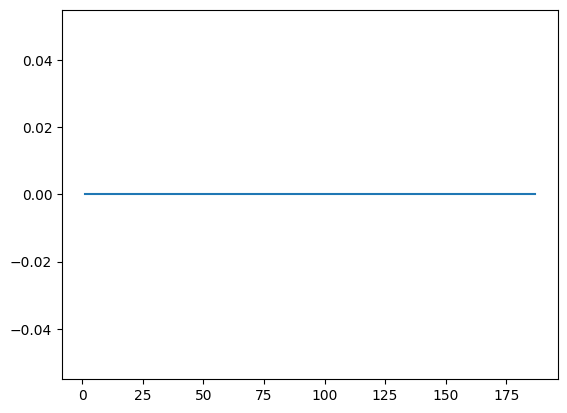

In [14]:
xpoints, ypoints, mc, se, diff_p, artifact, mci = corr_fix("data/simplest.txt", "111110101101", 3)

# Plot
plt.plot(xpoints, ypoints)
plt.show()

#### Count the occurences of a spaced k-mer in a set of sequences

In [776]:
# This is some artifact of a test: #### Turn data into numeric sequence and binary string into k-mer profie. Furthermore, multiply the two to get all spaced k-mers.
k = sum(spaced_kmer_profile)
L = len(spaced_kmer_profile)

# Turn into np arrays for componentwise multiplication
spaced_kmer_profile = np.array(spaced_kmer_profile)
sequence = np.array(sequence)

seqs_kmers = []
for i in range(len(sequence) - len(spaced_kmer_profile)):
    spaced_kmer = sequence[i:i+L] * spaced_kmer_profile
    spaced_kmer = spaced_kmer[spaced_kmer != 0]
    seqs_kmers.append(spaced_kmer)


In [581]:
with open("data/seqs.txt") as file_in:
    seqs = []
    for line in file_in:
        newline = line.rstrip('\n')
        sequence_chars = [char for char in newline]
        sequence = parse_nucleotides(sequence_chars)
        seqs.append(np.array(sequence))

In [582]:
spaced_kmer_str_profile = "11110111111011011101010111011011111101111"
spaced_kmer_profile = [int(character) for character in spaced_kmer_str_profile]
k = sum(spaced_kmer_profile)
L = len(spaced_kmer_profile)

# Turn into np arrays for componentwise multiplication
spaced_kmer_profile = np.array(spaced_kmer_profile)

In [583]:
# Iterate over k-mers
seqs_kmers = {}
for sequence in seqs:
    for i in range(len(sequence) - L):
        spaced_kmer = sequence[i:i+L] * spaced_kmer_profile
        spaced_kmer = spaced_kmer[spaced_kmer != 0]
        s = ''.join(str(x) for x in spaced_kmer)
        if s not in seqs_kmers:
            seqs_kmers[s] = 1
        else:
            seqs_kmers[s] = seqs_kmers[s] + 1

In [584]:
# get counts from dictionary
seq1 = seqs[0]
counts = []
for i in range(len(sequence) - L):
    spaced_kmer = seq1[i:i+L] * spaced_kmer_profile
    spaced_kmer = spaced_kmer[spaced_kmer != 0]
    s = ''.join(str(x) for x in spaced_kmer)
    counts.append(seqs_kmers[s])

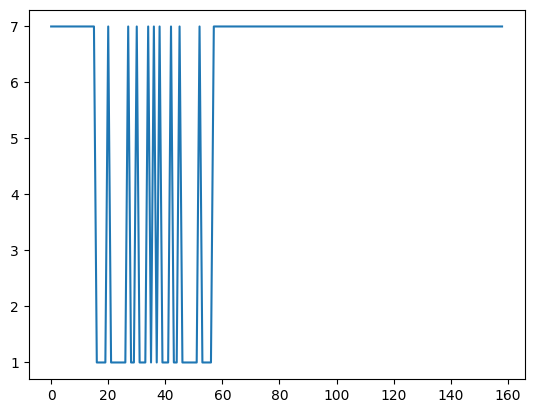

In [585]:
# Plot counts
xpoints = np.array([i for i in range(len(sequence) - L)])
ypoints = np.array(counts)

plt.plot(xpoints, ypoints)
plt.show()

#### Get maxcount from counts

In [587]:
xpoints = np.array([i for i in range(len(sequence) - L)])
ypoints = np.array([maxcount(i, seqs, seqs_kmers, spaced_kmer_profile) for i in xpoints])

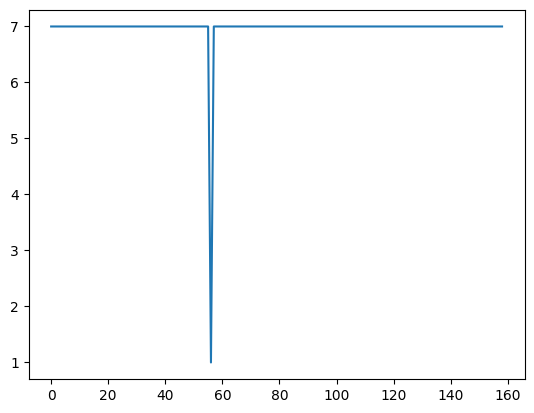

In [588]:
plt.plot(xpoints, ypoints)
plt.show()

### Put it all into one function:

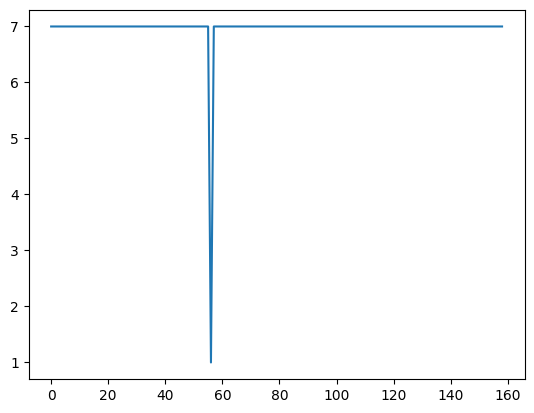

In [590]:
# Test function on known data
xpoints, ypoints = count_profiles("data/seqs.txt", "11110111111011011101010111011011111101111", 0)
plt.plot(xpoints, ypoints)
plt.show()

### Test on the simplest possible circular data

- Note that each subsequence part has length 20.
- The overall circular sequence has the shape -A-R-B-R-C-
- The reads are A-R, R-B, B-R, R-C, C-A
- Furthermore, I removed two nucleotides at the beginning and end of all reads
- This means that the transition appears at position 18 in all the sequences

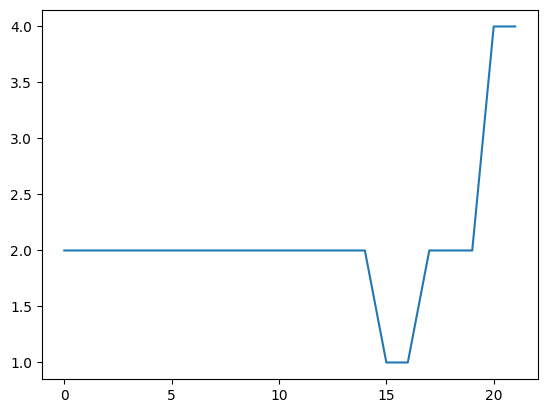

In [591]:
# Execute the function we created above on the circular synthetic data.
xpoints, ypoints = count_profiles("data/circular-data.txt", "11011010101111", 0)

# Plot
plt.plot(xpoints, ypoints)
plt.show()

### Let's now test this on the same circular data but add one sequence with two changed nucleotides
To be specific:
- I added the C-A read again and changed the second character from g to t.
- Added the R-B read again and changed second to last character

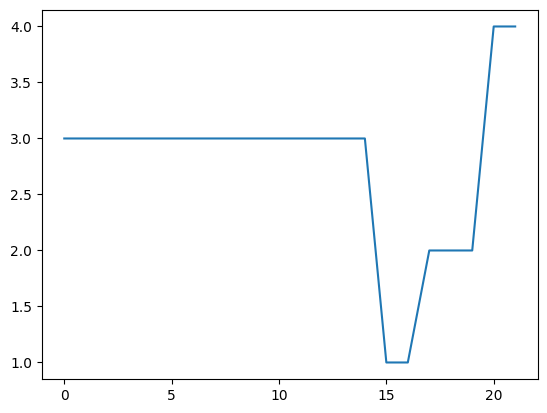

In [592]:
# Execute the function we created above on the circular synthetic data.
xpoints, ypoints = count_profiles("data/circular-data-withsnp.txt", "11011010111011", 0)

# Plot
plt.plot(xpoints, ypoints)
plt.show()

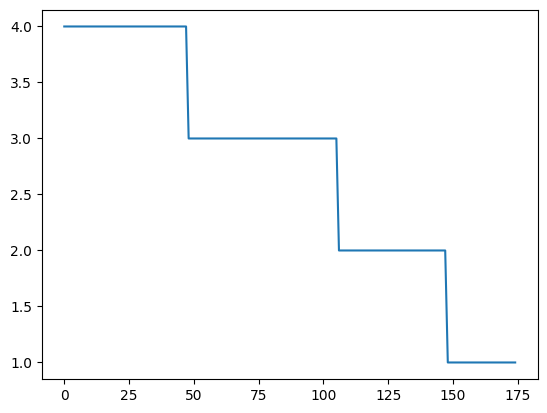

In [640]:
xpoints, ypoints = count_profiles("data/simplest.txt", "1111011111101101110101011", 3)

# Plot
plt.plot(xpoints, ypoints)
plt.show()

### Bit more elaborate but perfect synthetic data

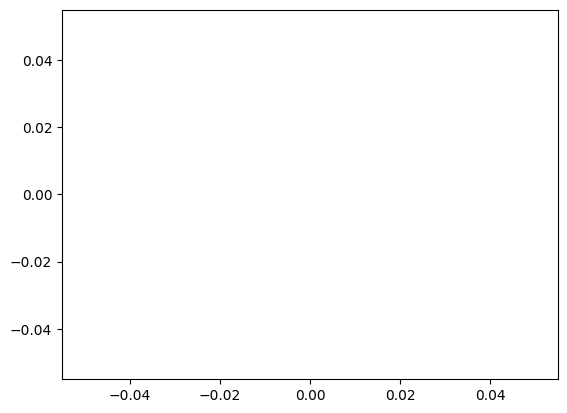

In [594]:
# Execute the function we created above on the circular synthetic data.
xpoints, ypoints = count_profiles("data/output.txt", "11110111111011011101010111011011111101111", 0)

# Plot
plt.plot(xpoints, ypoints)
plt.show()

### Now imperfect


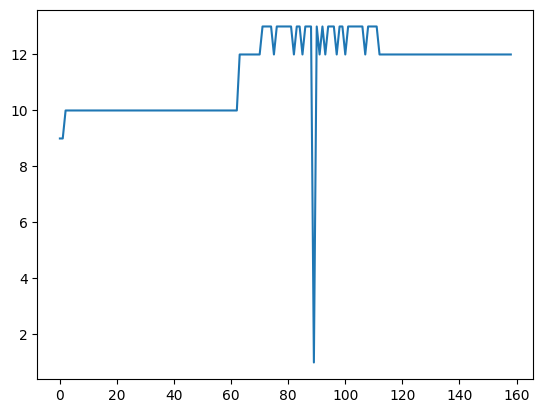

In [595]:
# Execute the function we created above on the circular synthetic data.
xpoints, ypoints = count_profiles("data/manipulated_output.txt", "11110111111011011101010111011011111101111", 0)

# Plot
plt.plot(xpoints, ypoints)
plt.show()

### Let's create the difference profiles now

##### Potential-based correction idea

In [597]:
# NONSENSE !!
def corr_count_diff_profiles2(filename, str_profile, seq_to_investigate=0):
    seqs = []
    with open(filename) as file_in:
        for line in file_in:
            newline = line.rstrip('\n')
            sequence_chars = [char for char in newline]
            sequence = parse_nucleotides(sequence_chars)
            seqs.append(np.array(sequence))

    profile = [int(character) for character in str_profile]
    k = sum(profile)
    L = len(profile)
    
    # Turn into np arrays for componentwise multiplication
    profile = np.array(profile)
    
    # Count occurence of spaced k-mers
    seqs_kmers = {}
    for sequence in seqs:
        for i in range(len(sequence) - L):
            spaced_kmer = sequence[i:i+L] * profile
            spaced_kmer = spaced_kmer[spaced_kmer != 0]
            s = ''.join(str(x) for x in spaced_kmer)
            if s not in seqs_kmers:
                seqs_kmers[s] = 1
            else:
                seqs_kmers[s] = seqs_kmers[s] + 1
    
    # Get maxcounts from counts
    seq1 = seqs[seq_to_investigate]
    xpoints = np.array([i for i in range(len(seq1) - L)])
    ypoints = []
    running_count = 0
    prev_mc = 0
    potential = 0
    for i in xpoints:
        mc = maxcount(i, seqs, seqs_kmers, profile, seq_to_investigate=seq_to_investigate)
        target = seqs[seq_to_investigate]
        #print(target)
        #start, end = correct_counts(seqs, target, i, profile)
        diff = mc - prev_mc
        start, end = correct_counts(seqs, target, i, profile)
        potential += end - start
        correction = 0
        print("pot: " + str(potential) + " vs. "+ str(diff))
        if np.abs(potential) >= np.abs(diff) and ((potential <= 0 and diff >= 0) or (potential >= 0 and diff <= 0)):
            correction = diff
            potential += diff

        mc -= correction
        prev_mc = mc
        ypoints.append(mc)
        
    ypoints = np.array(ypoints)
    return xpoints, ypoints

## Test Count diff profiles

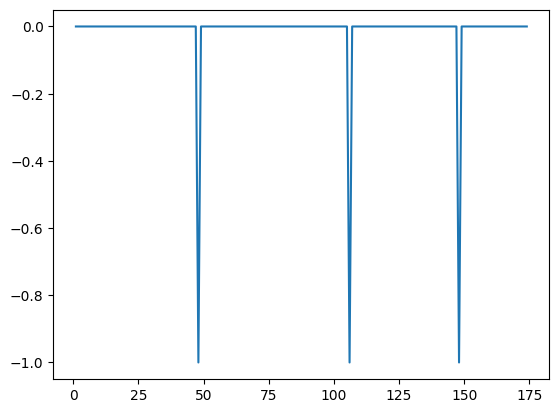

In [599]:
# Execute the function we created above on the circular synthetic data.
xpoints, ypoints = count_diff_profiles("data/simplest.txt", "1111011111101101110101011", 3)

# Plot
plt.plot(xpoints, ypoints)
plt.show()

## Let's now correct these ! 

#### Test on simplest data

correction: 0
correction: 0
correction: 0
correction: 0
correction: 0
correction: 0


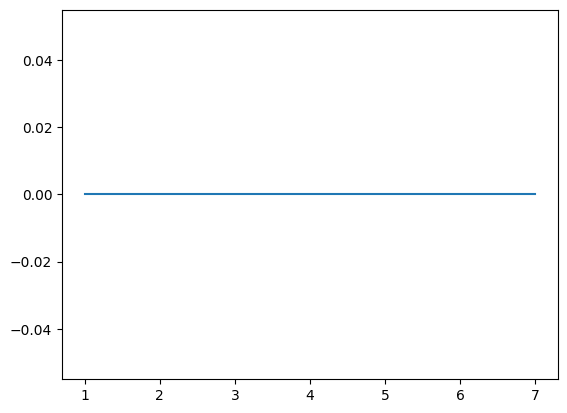

In [618]:
xpoints, ypoints = corr_count_diff_profiles("data/simplest.txt", "11110111111011011101010111011011111101111", 0)

# Plot
plt.plot(xpoints, ypoints)
plt.show()

correction: 0
correction: 0
correction: 0
correction: 0
correction: 0
correction: 0
correction: 0
correction: 0
correction: 0
correction: 0
correction: 0
correction: 0
correction: 0
correction: 0
correction: 0
correction: 0
correction: 0
correction: 0
correction: 0
correction: 0
correction: 0
correction: 0
correction: 0
correction: 0
correction: 0
correction: 0
correction: 0
correction: 0
correction: 0
correction: 0
correction: 0
correction: 0
correction: 0
correction: 0
correction: 0
correction: 0
correction: 0
correction: 0
correction: 0
correction: 0
correction: 0
correction: 0
correction: 0
correction: 0
correction: 0
correction: 0
correction: 0
correction: 0
correction: 0
correction: 0
correction: 0
correction: 0
correction: 0
correction: 0
correction: 0
correction: -1
correction: 0
correction: 0
correction: 0
correction: 0
correction: 0
correction: 0
correction: 0
correction: 0
correction: 0
correction: 0
correction: 0
correction: 0
correction: 0
correction: 0
correction: 0
corre

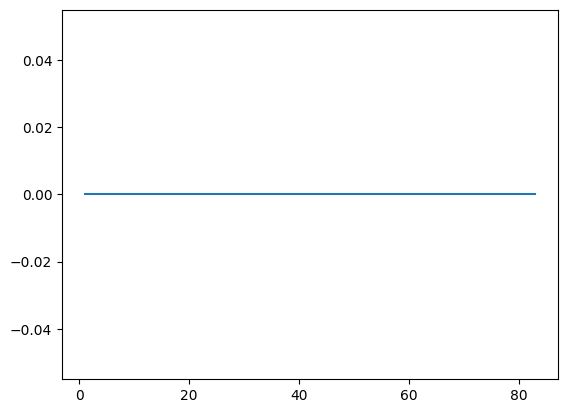

In [619]:
xpoints, ypoints = corr_count_diff_profiles("data/simplest4.txt", "11101101110111", 1)

# Plot
plt.plot(xpoints, ypoints)
plt.show()

#### Test on more complex synthetic dataset with one SNP

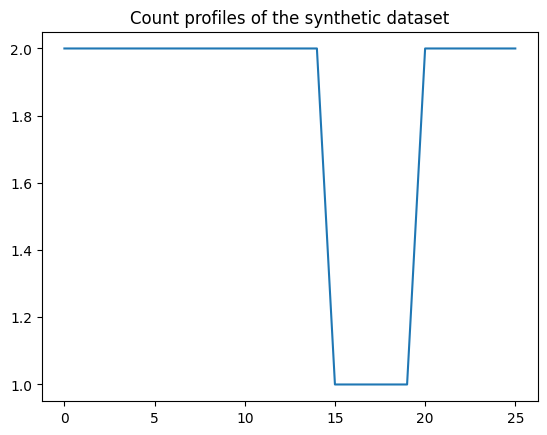

In [620]:
# Execute the function we created above on the circular synthetic data.
xpoints, ypoints = count_profiles("data/circular-data.txt", "1111010111", 4)

# Plot
plt.plot(xpoints, ypoints)
plt.title("Count profiles of the synthetic dataset")
plt.show()

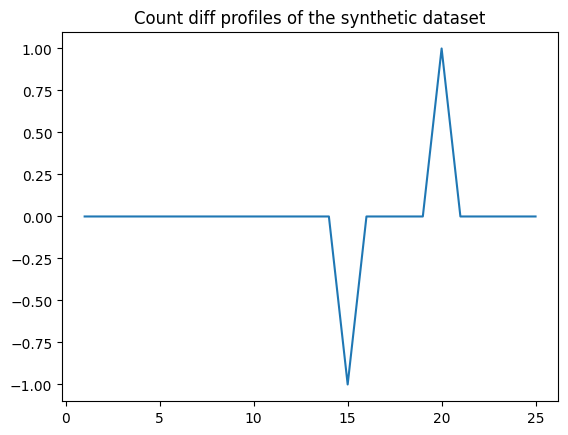

In [604]:
# Execute the function we created above on the circular synthetic data.
xpoints, ypoints = count_diff_profiles("data/circular-data.txt", "1111010111", 4)

# Plot
plt.plot(xpoints, ypoints)
plt.title("Count diff profiles of the synthetic dataset")
plt.show()

correction: 0
correction: 0
correction: 0
correction: 0
correction: 0
correction: 0
correction: 0
correction: 0
correction: 0
correction: 0
correction: 0
correction: 0
correction: 0
correction: 0
correction: 1
correction: 0
correction: 0
correction: 0
correction: 0
correction: -1
correction: 0
correction: 0
correction: 0
correction: 0


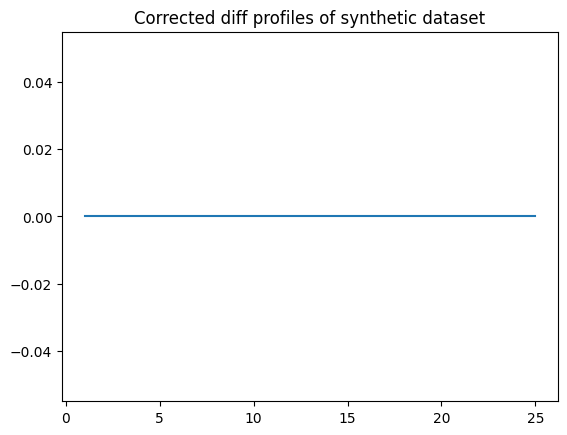

In [605]:
# Execute the function we created above on the circular synthetic data 
# with no repetition region in the selected read!
xpoints, ypoints = corr_count_diff_profiles("data/circular-data.txt", "1111010111", 4)

# Plot
plt.plot(xpoints, ypoints)
plt.title("Corrected diff profiles of synthetic dataset")
plt.show()

correction: 0
correction: 0
correction: 0
correction: 0
correction: 0
correction: 0
correction: 0
correction: 0
correction: 0
correction: 0
correction: 0
correction: 0
correction: 0
correction: 0
correction: 1
correction: 0
correction: 0
correction: 0
correction: 0
correction: -2
correction: 0
correction: 0
correction: 0
correction: 0


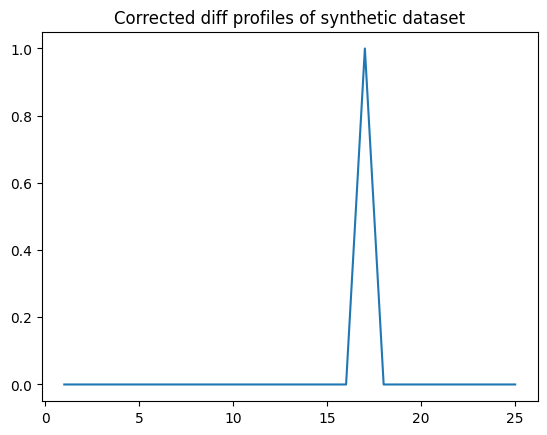

In [606]:
# Execute the function we created above on the circular synthetic data with a repetition region at the end of a read
xpoints, ypoints = corr_count_diff_profiles("data/circular-data.txt", "1111010111", 0)

# Plot
plt.plot(xpoints, ypoints)
plt.title("Corrected diff profiles of synthetic dataset")
plt.show()

correction: 0
correction: 0
correction: 0
correction: 0
correction: 0
correction: 0
correction: 0
correction: 0
correction: 0
correction: 0
correction: 0
correction: 0
correction: 0
correction: 0
correction: 2
correction: 0
correction: 0
correction: 0
correction: 0
correction: -1
correction: 0
correction: 0
correction: 0
correction: 0


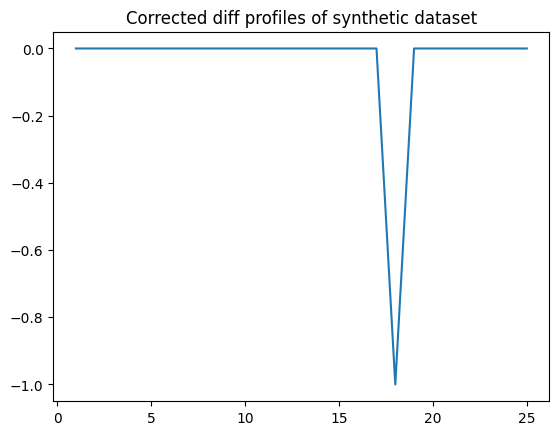

In [607]:
# Execute the function we created above on the circular synthetic data
# with a repetition region at the start of a read
xpoints, ypoints = corr_count_diff_profiles("data/circular-data.txt", "1111010111", 1)

# Plot
plt.plot(xpoints, ypoints)
plt.title("Corrected diff profiles of synthetic dataset")
plt.show()

## Circular data with SNP

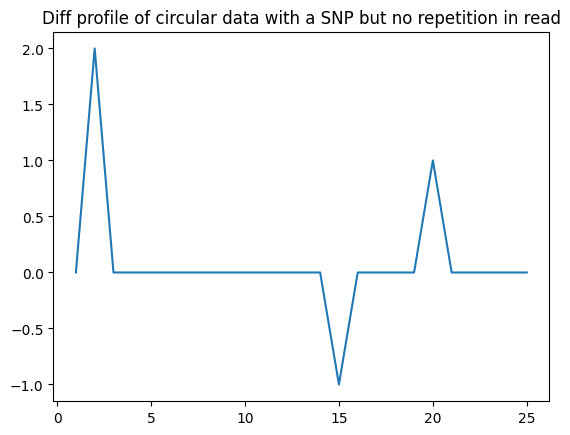

In [608]:
# Execute the function we created above on the circular synthetic data with a SNP
# with no repetition!
xpoints, ypoints = count_diff_profiles("data/circular-data-withsnp.txt", "1111011011", 5)

# Plot
plt.plot(xpoints, ypoints)
plt.title("Diff profile of circular data with a SNP but no repetition in read")
plt.show()

correction: 0
correction: 0
correction: 0
correction: 0
correction: 0
correction: 0
correction: 0
correction: 0
correction: 0
correction: 0
correction: 0
correction: 0
correction: 0
correction: 0
correction: 1
correction: 0
correction: 0
correction: 0
correction: 0
correction: -1
correction: 0
correction: 0
correction: 0
correction: 0


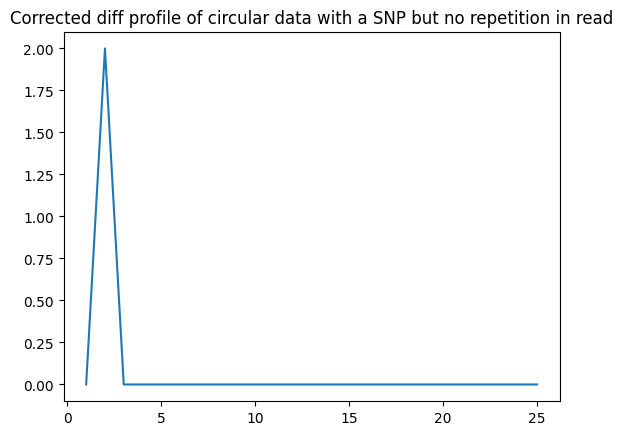

In [609]:
# Execute the function we created above on the circular synthetic data with a SNP
# with no repetition!
xpoints, ypoints = corr_count_diff_profiles("data/circular-data-withsnp.txt", "1111011011", 5)

# Plot
plt.plot(xpoints, ypoints)
plt.title("Corrected diff profile of circular data with a SNP but no repetition in read")
plt.show()

correction: 0
correction: 0
correction: 0
correction: 0
correction: 0
correction: 0
correction: 0
correction: 0
correction: 0
correction: 0
correction: 0
correction: 0
correction: 0
correction: 0
correction: 2
correction: 0
correction: 0
correction: 0
correction: 0
correction: -1
correction: 0
correction: 0
correction: 0
correction: 0


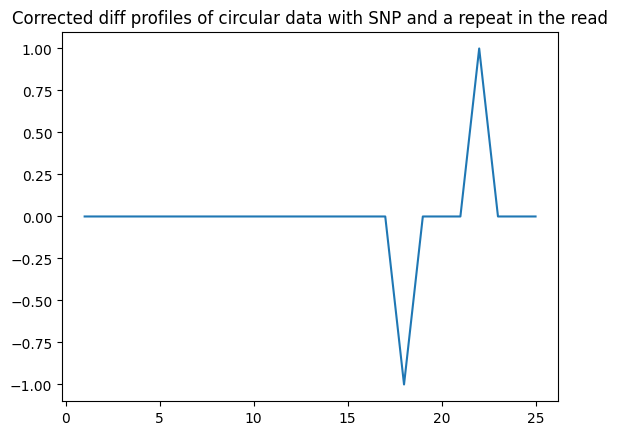

In [610]:
# circular synthetic data with snp and repetition in read
xpoints, ypoints = corr_count_diff_profiles("data/circular-data-withsnp.txt", "1111011011", 3)

# Plot
plt.plot(xpoints, ypoints)
plt.title("Corrected diff profiles of circular data with SNP and a repeat in the read")
plt.show()

## Complex synthetic data

In [645]:
# Lets check first if our data contains repeats!
seqs = []
with open("data/output.txt") as file_in:
    for line in file_in:
        newline = line.rstrip('\n')
        sequence_chars = [char for char in newline]
        sequence = parse_nucleotides(sequence_chars)
        seqs.append(np.array(sequence))

for seq in seqs:
    reps = check_repeats(seq, "111111111")
    if len(reps) != 0:
        print("repeat in seq ..")

[2]
[2, 2]
[2, 2, 2]
[2, 2, 2, 2]
[2, 2, 2, 2]
[2, 2, 2, 2, 2]
[2, 2, 2, 2, 2, 2]
[2, 2, 2, 2, 2, 2, 2]
[2, 2, 2, 2, 2, 2, 2, 2]
[2, 2, 2, 2, 2, 2, 2, 2, 2]
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[2, 2, 

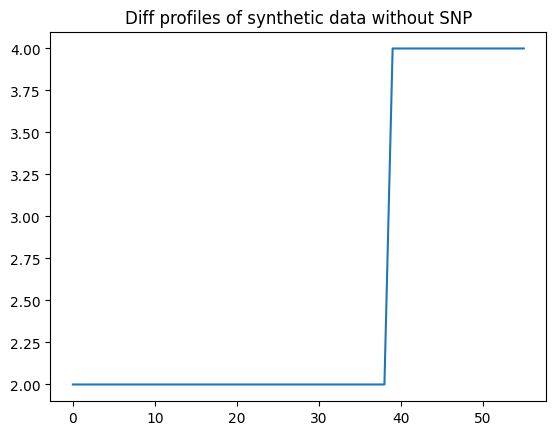

In [659]:
#
xpoints, ypoints = count_profiles("data/output.txt", "11110111111011", 6)

# Plot
plt.plot(xpoints, ypoints)
plt.title("Diff profiles of synthetic data without SNP")
plt.show()

[2]
[2, 2]
[2, 2, 2]
[2, 2, 2, 2]
[2, 2, 2, 2]
[2, 2, 2, 2, 2]
[2, 2, 2, 2, 2, 2]
[2, 2, 2, 2, 2, 2, 2]
[2, 2, 2, 2, 2, 2, 2, 2]
[2, 2, 2, 2, 2, 2, 2, 2, 2]
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[2, 2, 

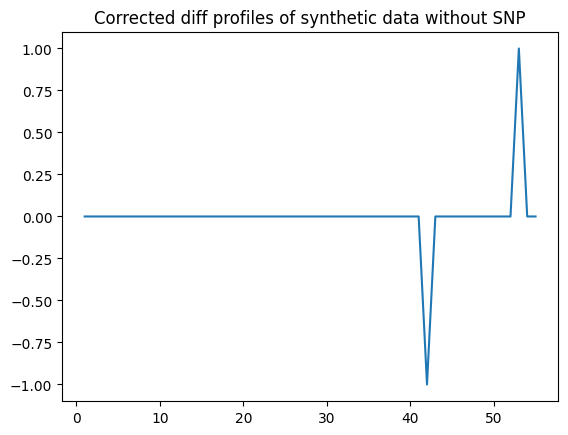

In [658]:
#
xpoints, ypoints = corr_count_diff_profiles("data/output.txt", "11110111111011", 6)

# Plot
plt.plot(xpoints, ypoints)
plt.title("Corrected diff profiles of synthetic data without SNP")
plt.show()

## Test for the count diff profile correction fix!!!

In [15]:
# Lets check first if our data contains repeats!
seqs = []
with open("data/longseq.txt") as file_in:
    for line in file_in:
        newline = line.rstrip('\n')
        sequence_chars = [char for char in newline]
        sequence = parse_nucleotides(sequence_chars)
        seqs.append(np.array(sequence))

profile = "111111111111"
for seq in seqs:
    print(seq)
    reps = check_repeats(seq, profile)
    if len(reps) != 0:
        print("repeat in seq ..")
    else: 
        print("No repeat for profile " + profile)

[2 1 4 ... 1 2 2]
No repeat for profile 111111111111


In [27]:
for i in range(72):
    # Execute the function we created above on the circular synthetic data.
    # 11110111111011011101010111011011111101111
    # 11111111111101011101010111011011111101111
    # 111111111111111111111111111111111 works for this bboy
    # 111111111111101111111111111111111
    xpoints, ypoints, maxcounts, se, pc_diff_profile, artifact, mci = corr_fix("data/output.txt", "111111111111111111111111111111111", i)
    if not (np.array(ypoints) == np.array([0 for i in range(len(ypoints))])).all():
        print(mci)
        print(artifact)
        # Max Counts
        plt.title("mc: "+str(i))
        plt.plot([i for i in range(len(maxcounts))], maxcounts)
        plt.show()
        # DP
        plt.title("DP: "+str(i))
        plt.plot([i for i in range(len(pc_diff_profile))], pc_diff_profile)
        plt.show()
        print([i for i in range(len(pc_diff_profile)) if pc_diff_profile[i]!=0])
        # Corrected DP
        plt.title("Corrected: "+str(i))
        plt.plot(xpoints, ypoints)
        plt.show()
        print([i for i in range(len(ypoints)) if ypoints[i]!=0])
        break

[[-1, (1, 21), [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1]], [-1, (21, 32), [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1]], [1, (81, 82), [1]], [-1, (163, 177), [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1]], [-1, (177, 186), [0, 0, 0, 0, 0, 0, 0, 0, -1]]]


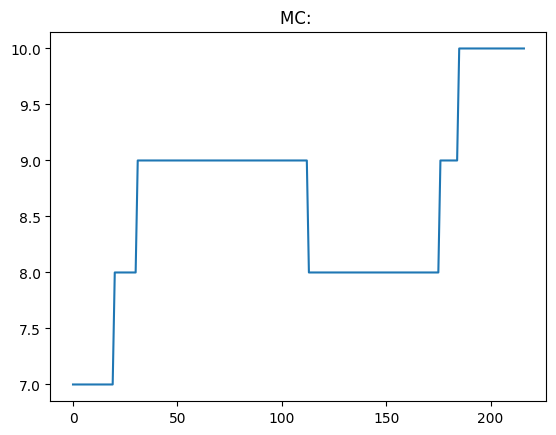

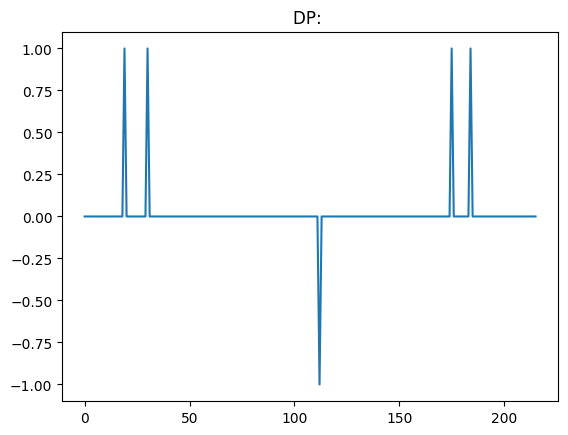

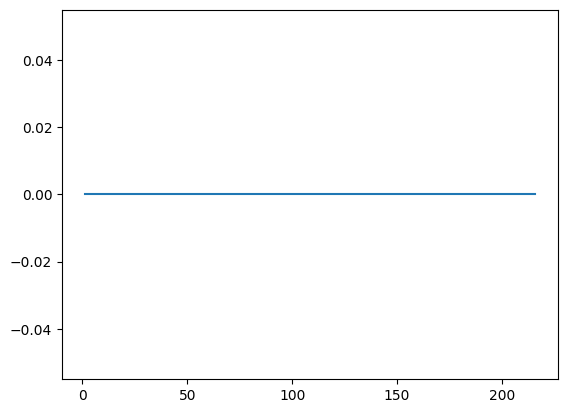

In [38]:
# Execute the function we created above on the circular synthetic data.
xpoints, ypoints, maxcounts, se, pc_diff_profile, artifact, mci = corr_fix("data/manipulated_output.txt", "111111011111101111111111111111111", 0)
print(artifact)
#
plt.title("MC: ")
plt.plot([i for i in range(len(pc_diff_profile)+1)], maxcounts)
plt.show()
#
plt.title("DP: ")
plt.plot([i for i in range(len(pc_diff_profile))], pc_diff_profile)
plt.show()
# Plot
plt.plot(xpoints, ypoints)
plt.show()